In [66]:
#Importing the required liberaries 
import os
import numpy as np
import pandas as pd

In [67]:
#Reading the dtaset
df = pd.read_csv("Online Retail Data Set.csv",encoding="latin1")

In [68]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,01-12-2010 08:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,01-12-2010 08:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,01-12-2010 08:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,01-12-2010 08:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,01-12-2010 08:34,1.69,13047.0,United Kingdom


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


There are null values in Description and cutomer Ids. We will check how we can deal with it.

In [70]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


There are negative values in Quantity and Unit Price columns. we will remove those.


In [73]:
print(df.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [74]:
df = df[df["Quantity"]>=0]

In [75]:
df = df[df["UnitPrice"]>=0]

In [76]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397924 non-null  object 
 1   StockCode    397924 non-null  object 
 2   Description  397924 non-null  object 
 3   Quantity     397924 non-null  int64  
 4   InvoiceDate  397924 non-null  object 
 5   UnitPrice    397924 non-null  float64
 6   CustomerID   397924 non-null  float64
 7   Country      397924 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


In [78]:
# Checking if we are having any invoice id having missing and present customer Id so that we can impute them.
mask = df.groupby("InvoiceNo")["CustomerID"].apply(
    lambda x: x.isna().any() and x.notna().any()
)

problem_invoices = mask[mask].index.tolist()

print("Invoices with missing + present customer_id:", problem_invoices)

Invoices with missing + present customer_id: []


There are no invoices present with the help of which we can impute the missing customer ID, we have to delete the missing customerId rows

In [79]:
# Removing null customerID
df = df.dropna(subset = ["CustomerID"])

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397924 non-null  object 
 1   StockCode    397924 non-null  object 
 2   Description  397924 non-null  object 
 3   Quantity     397924 non-null  int64  
 4   InvoiceDate  397924 non-null  object 
 5   UnitPrice    397924 non-null  float64
 6   CustomerID   397924 non-null  float64
 7   Country      397924 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


In [81]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


Lets do some EDA

In [82]:
# Changing the date to datetime format and extracting other required data
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"],format="%d-%m-%Y %H:%M", errors="coerce")

df["InvoiveDay"] = df["InvoiceDate"].dt.date
df["InvoiceTime"] = df["InvoiceDate"].dt.time
df["Day"] = df["InvoiceDate"].dt.day_name()
df["Month"] = df["InvoiceDate"].dt.month_name()

In [83]:
# introducting a new column that indicates the Amount
df["Amount"] = df["Quantity"] * df["UnitPrice"]

In [84]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiveDay,InvoiceTime,Day,Month,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,08:26:00,Wednesday,December,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,Wednesday,December,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,08:26:00,Wednesday,December,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,Wednesday,December,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,Wednesday,December,20.34


In [87]:
#Checking all the days present
print(df["Day"].unique())

['Wednesday' 'Thursday' 'Friday' 'Sunday' 'Monday' 'Tuesday']


In [88]:
# Exploring the timeframe of the data and visualizing the Sales
trend = df.groupby(df["InvoiceDate"].dt.to_period("M"))["Amount"].sum().reset_index()
trend["InvoiceDate"] = trend["InvoiceDate"].astype(str)

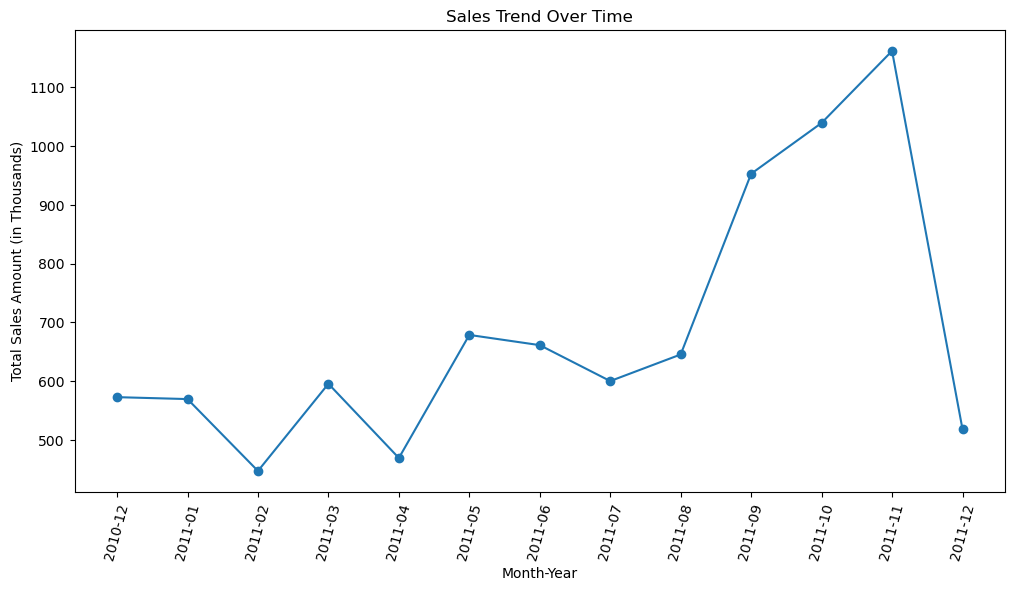

In [89]:
#Plotting the month-wise sales
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(trend["InvoiceDate"], trend["Amount"]/1000, marker="o")

plt.xticks(rotation=75)
plt.xlabel("Month-Year")
plt.ylabel("Total Sales Amount (in Thousands)")
plt.title("Sales Trend Over Time")
plt.show()

It can be observed from the avove graph that there's a steep upward trend from the month of August. The sales is drastically high in the month of september and october. The sales peaked in the month of november and we can see a steep decline towards the month of December.

In [90]:
# Exploring the timings of the invoices
df["Hour"] = pd.to_datetime(df["InvoiceTime"].astype(str)).dt.hour
invoice_hours = df.groupby("Hour")["InvoiceNo"].count().reset_index(name="Invoice Count")

C:\Users\Rajul Shah\AppData\Local\Temp\ipykernel_16308\2054956600.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Hour"] = pd.to_datetime(df["InvoiceTime"].astype(str)).dt.hour


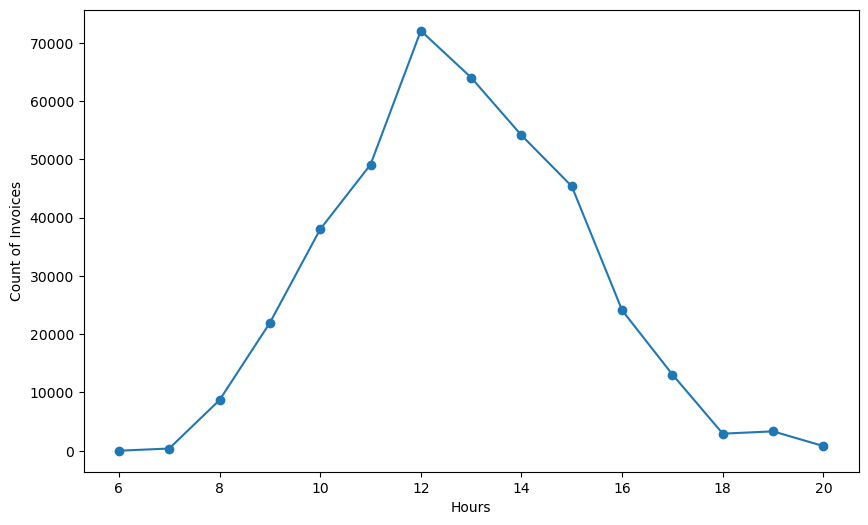

In [93]:
# Plotting the timings of the invoices
import matplotlib.pyplot as plt
plt.figure(figsize = (10,6))
plt.plot (invoice_hours["Hour"], invoice_hours["Invoice Count"], marker='o')
plt.xlabel("Hours")
plt.ylabel("Count of Invoices")
plt.show()

We can note from the above graph that the maximum online shopping is done between 11AM to 3PM. 

In [94]:
df.head(5000)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiveDay,InvoiceTime,Day,Month,Amount,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,08:26:00,Wednesday,December,15.30,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,Wednesday,December,20.34,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,08:26:00,Wednesday,December,22.00,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,Wednesday,December,20.34,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,Wednesday,December,20.34,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7369,537034,22780,LIGHT GARLAND BUTTERFILES PINK,8,2010-12-03 17:20:00,4.25,13081.0,United Kingdom,2010-12-03,17:20:00,Friday,December,34.00,17
7370,537034,22940,FELTCRAFT CHRISTMAS FAIRY,12,2010-12-03 17:20:00,4.25,13081.0,United Kingdom,2010-12-03,17:20:00,Friday,December,51.00,17
7371,537034,22198,LARGE POPCORN HOLDER,12,2010-12-03 17:20:00,1.65,13081.0,United Kingdom,2010-12-03,17:20:00,Friday,December,19.80,17
7372,537034,22745,POPPY'S PLAYHOUSE BEDROOM,6,2010-12-03 17:20:00,2.10,13081.0,United Kingdom,2010-12-03,17:20:00,Friday,December,12.60,17


In [97]:
# Checking country-wise unique customer count
Country_Wise = df.groupby("Country").agg ( Total_Amount = ("Amount","sum"), Customer_Count=("CustomerID","nunique")).reset_index()

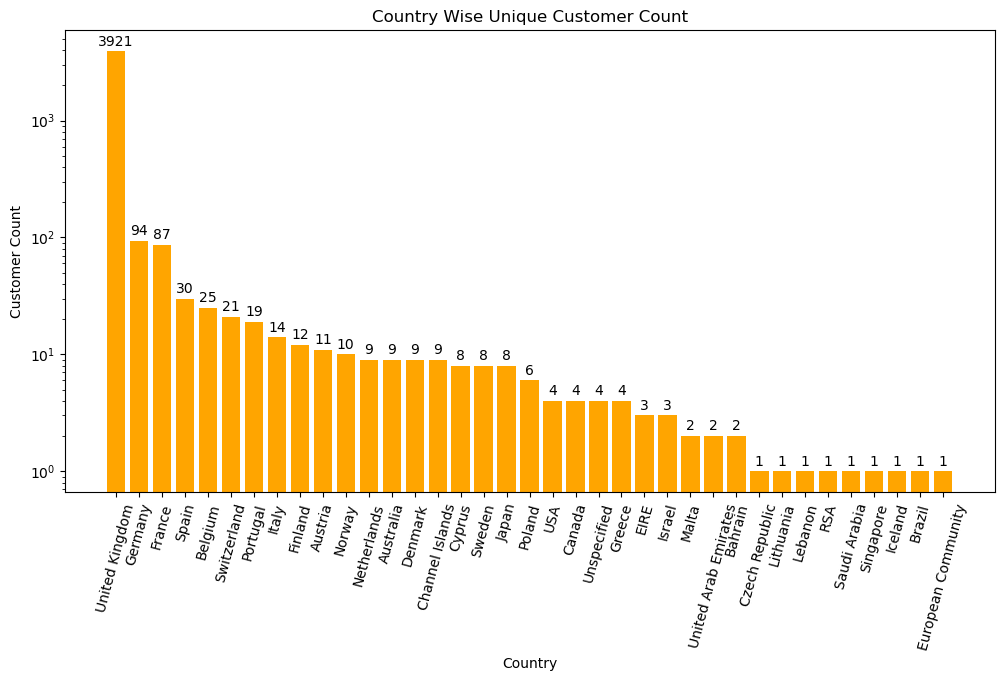

In [98]:
#Plotting country-wise unique customer count
sorted_Country_Wise = Country_Wise.sort_values("Customer_Count", ascending=False)
plt.figure(figsize=(12,6))
bars = plt.bar(sorted_Country_Wise["Country"], sorted_Country_Wise["Customer_Count"], color="orange")
plt.xticks(rotation=75)
plt.xlabel("Country")
plt.ylabel("Customer Count")
plt.title("Country Wise Unique Customer Count")
plt.bar_label(bars, padding=2)
plt.yscale('log')
plt.show()

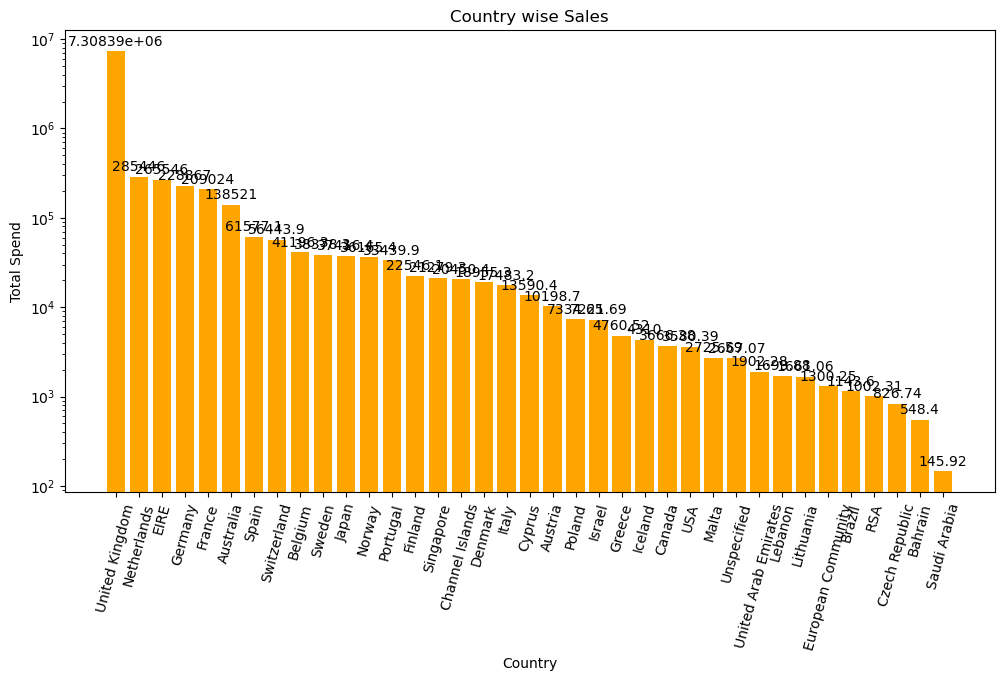

In [99]:
# Plotting country-wise Sales
sorted_2 = Country_Wise.sort_values("Total_Amount", ascending=False)
plt.figure(figsize=(12,6))
bars = plt.bar(sorted_2["Country"], sorted_2["Total_Amount"], color="orange")
plt.xticks(rotation=75)
plt.xlabel("Country")
plt.ylabel("Total Spend")
plt.title("Country wise Sales")
plt.bar_label(bars, padding=2)
plt.yscale('log')
plt.show()


In [100]:
# Lets check which products are sold the most.
product_count = df.groupby("Description")["Quantity"].sum().reset_index()
product_count = product_count.sort_values("Quantity", ascending=False)

In [101]:
# Top 10 most Sold products
product_count.head(10)

,Description,Quantity
2319,"PAPER CRAFT , LITTLE BIRDIE",80995
1992,MEDIUM CERAMIC TOP STORAGE JAR,77916
3786,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54415
1762,JUMBO BAG RED RETROSPOT,46181
3698,WHITE HANGING HEART T-LIGHT HOLDER,36725
216,ASSORTED COLOUR BIRD ORNAMENT,35362
2269,PACK OF 72 RETROSPOT CAKE CASES,33693
2600,POPCORN HOLDER,30931
2656,RABBIT NIGHT LIGHT,27202
2047,MINI PAINT SET VINTAGE,26076


In [102]:
# Lets check the trend of sales across various Weekdays
weekday_sales = (df.groupby("Day").agg (Total_Sales = ('Amount','sum'), Invoice_Count= ("InvoiceNo","nunique")).reset_index())
weekday_sales["Total_Sales"] = weekday_sales["Total_Sales"].round().astype(int)

In [103]:
weekday_sales

,Day,Total_Sales,Invoice_Count
0,Friday,1485917,2831
1,Monday,1367146,2863
2,Sunday,792514,2169
3,Thursday,1976859,4033
4,Tuesday,1700635,3185
5,Wednesday,1588336,3455


We can observe that Tuesday, wednesday and thursdays have more sales compared to other days

RFM customer segmentation is a marketing method that ranks customers based on their Recency (how recently they purchased), Frequency (how often they purchase), and Monetary Value (how much they spend). By analyzing these three transaction-based metrics, businesses can segment customers into groups to create more targeted marketing campaigns, improve customer retention, and increase overall loyalty and ROI. 

In [104]:
# We shall create a new dataframe and columns for scores of R, F & M
df_rfm = df

In [107]:
df_rfm['CustomerID'] = df_rfm['CustomerID'].astype(int)
df_rfm.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiveDay,InvoiceTime,Day,Month,Amount,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12-01,08:26:00,Wednesday,December,15.30,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,08:26:00,Wednesday,December,20.34,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12-01,08:26:00,Wednesday,December,22.00,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,08:26:00,Wednesday,December,20.34,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,08:26:00,Wednesday,December,20.34,8


In [108]:
# Setting the last day of the data as the referance
snapshot_date = df_rfm['InvoiveDay'].max() + pd.Timedelta(days=1)

In [110]:
# creating the customer-wise data required for RFM Analysis
rfm = df_rfm.groupby('CustomerID').agg({
    'InvoiveDay': lambda x: (snapshot_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                  # Frequency
    'Amount': 'sum'                                          # Monetary
})

In [111]:
rfm.head()

,InvoiveDay,InvoiceNo,Amount
CustomerID,,,
12346,326,1,77183.60
12347,3,7,4310.00
12348,76,4,1797.24
12349,19,1,1757.55
12350,311,1,334.40


In [112]:
rfm.rename(columns={'InvoiveDay': 'Recency',
                    'InvoiceNo': 'Frequency',
                    'Amount': 'Monetary'}, inplace=True)

print(rfm.head())

            Recency  Frequency  Monetary
CustomerID                              
12346           326          1  77183.60
12347             3          7   4310.00
12348            76          4   1797.24
12349            19          1   1757.55
12350           311          1    334.40


In [113]:
# Recency: lower is better → reverse the scoring
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1])

# Frequency: higher is better
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5])

# Monetary: higher is better
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5])

In [114]:
rfm.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score
CustomerID,,,,,,
12346,326,1,77183.60,1,1,5
12347,3,7,4310.00,5,5,5
12348,76,4,1797.24,2,4,4
12349,19,1,1757.55,4,1,4
12350,311,1,334.40,1,1,2


In [115]:
# Combining scores to get RFM_Segment and RFM Score
rfm['RFM_Segment'] = (
    rfm['R_Score'].astype(str) +
    rfm['F_Score'].astype(str) +
    rfm['M_Score'].astype(str)
)

rfm['RFM_Score'] = (
    rfm['R_Score'].astype(int) +
    rfm['F_Score'].astype(int) +
    rfm['M_Score'].astype(int)
)

In [116]:
rfm.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346,326,1,77183.60,1,1,5,115,7
12347,3,7,4310.00,5,5,5,555,15
12348,76,4,1797.24,2,4,4,244,10
12349,19,1,1757.55,4,1,4,414,9
12350,311,1,334.40,1,1,2,112,4


In [120]:
#Scaling the RFM_Score in order to use it in the ML Algo
from sklearn.preprocessing import StandardScaler

X = rfm[['RFM_Score']]   # feature
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

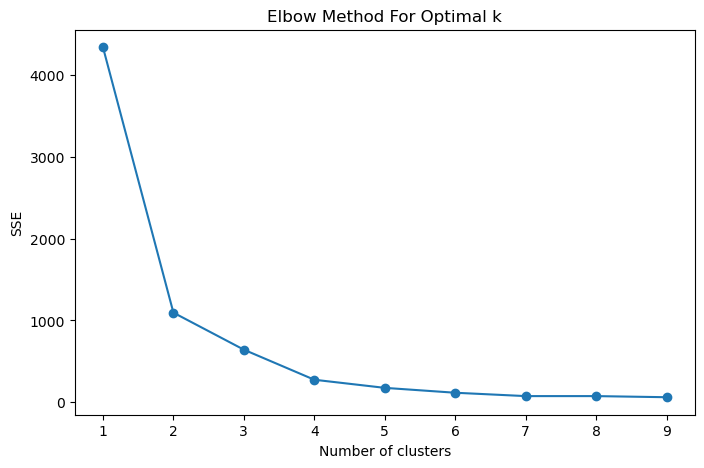

In [121]:
# Using elbow method to find the number of optimum clusters 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse[k] = kmeans.inertia_   # sum of squared distances

# Plot elbow
plt.figure(figsize=(8,5))
plt.plot(list(sse.keys()), list(sse.values()), marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.title("Elbow Method For Optimal k")
plt.show()

Based on the above graph, we will make 4 clusters

In [122]:
# Applying KMeans ML Algo
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(X_scaled)

In [123]:
print(rfm.groupby('Cluster')['RFM_Score'].describe())

          count       mean       std   min   25%   50%   75%   max
Cluster                                                           
0        1182.0   6.960237  0.820530   6.0   6.0   7.0   8.0   8.0
1        1340.0  10.482836  1.104883   9.0  10.0  10.0  11.0  12.0
2         885.0   4.178531  0.745873   3.0   4.0   4.0   5.0   5.0
3         932.0  14.064378  0.824007  13.0  13.0  14.0  15.0  15.0


In [124]:
# Adding the segment to our data based on clustering
def map_cluster_to_segment(cluster):
    if cluster == 3:
        return "Champions"
    elif cluster == 1:
        return "Loyal"
    elif cluster == 0:
        return "At Risk"
    elif cluster == 2:
        return "Lost"

rfm['Segment'] = rfm['Cluster'].map(map_cluster_to_segment)

In [125]:
rfm.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score,Cluster,Segment
CustomerID,,,,,,,,,,
12346,326,1,77183.60,1,1,5,115,7,0,At Risk
12347,3,7,4310.00,5,5,5,555,15,3,Champions
12348,76,4,1797.24,2,4,4,244,10,1,Loyal
12349,19,1,1757.55,4,1,4,414,9,1,Loyal
12350,311,1,334.40,1,1,2,112,4,2,Lost


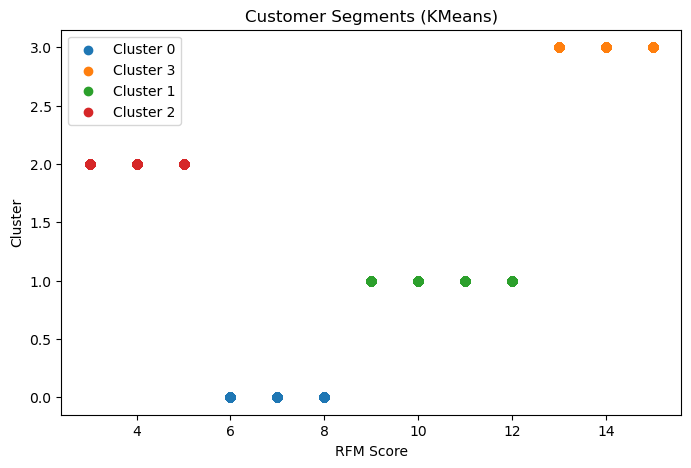

In [126]:
# Plotting the Clusters against the RFM Score
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
for cluster in rfm['Cluster'].unique():
    subset = rfm[rfm['Cluster'] == cluster]
    plt.scatter(subset['RFM_Score'], [cluster]*len(subset), label=f"Cluster {cluster}")

plt.xlabel("RFM Score")
plt.ylabel("Cluster")
plt.title("Customer Segments (KMeans)")
plt.legend()
plt.show()

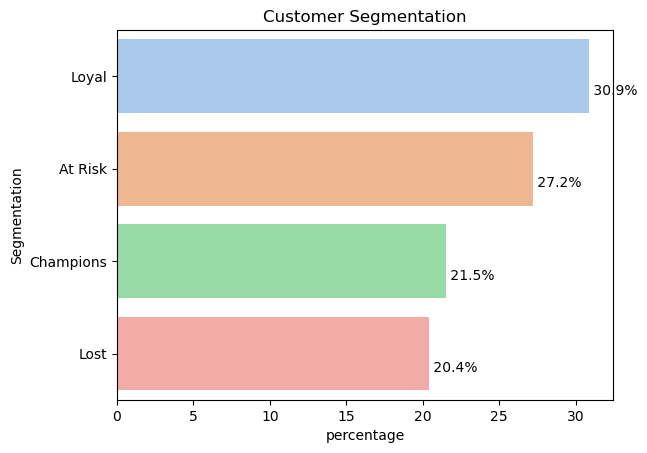

In [127]:
#Bar Plot for Our segments showing the percentage of each category
Segments = (rfm['Segment'].value_counts(normalize=True)* 100).reset_index(name='percentage')
Segments = Segments.round(1)
b =sns.barplot(y='Segment',x='percentage', data=Segments, palette = 'pastel')
for i, v in enumerate(Segments['percentage']):
    b.text(v,i+0.20," {:.1f}".format(v)+"%", color='black', ha="left")
    b.set_ylabel('Segmentation')
    b.set_title('Customer Segmentation')

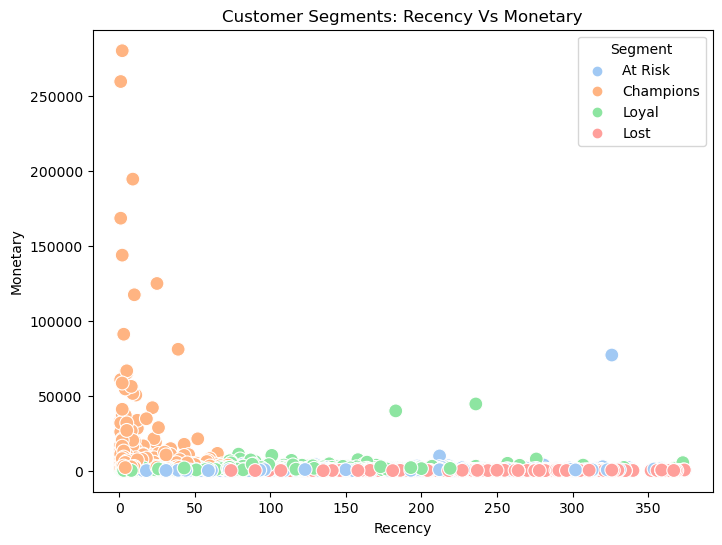

In [128]:
# Scatter plot of customers by Segment: Recency Vs Monetary
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter of Recency vs Monetary colored by Segment
plt.figure(figsize=(8,6))
sns.scatterplot(x='Recency', y='Monetary', hue='Segment', data=rfm, palette='pastel', s=100)
plt.title('Customer Segments: Recency Vs Monetary')
plt.show()

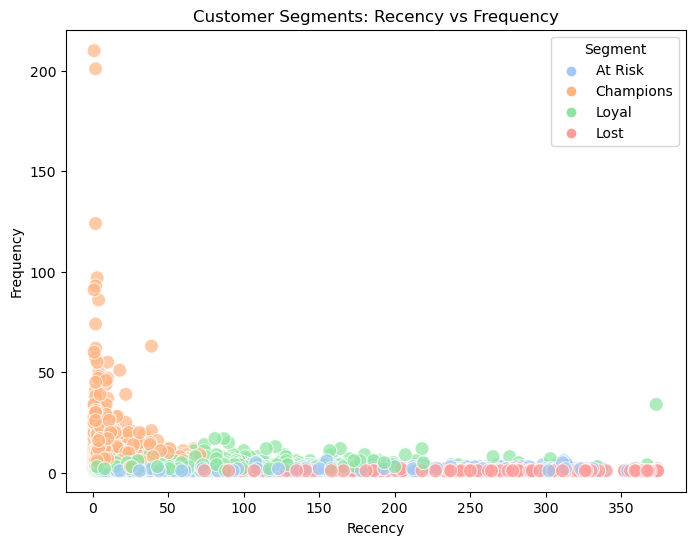

In [129]:
# Scatter plot of customers by Segment:Recency Vs Frequency
plt.figure(figsize=(8,6))
sns.scatterplot(data=rfm, x="Recency", y="Frequency", 
                hue="Segment", palette="pastel", alpha=0.7, s=100)

plt.xlabel("Recency")
plt.ylabel("Frequency")
plt.title("Customer Segments: Recency vs Frequency")
plt.legend(title="Segment")
plt.show()

Marketing Insights from RFM Segmentation

Customer Base Diversity:
The segmentation clearly shows distinct groups of customers — from Champions with high engagement to Lost customers who are inactive. This highlights that a one-size-fits-all marketing strategy won’t be effective; personalized campaigns per segment are essential.

Retention vs Acquisition Balance:
A significant portion of value comes from Champions and Loyal Customers. Retaining them should be a priority through loyalty programs and exclusive benefits. Meanwhile, At Risk and Lost segments show that churn management and reactivation campaigns can recover revenue without heavy new customer acquisition costs.

Revenue Concentration:
Champions and Loyal segments drive the majority of revenue (high Monetary scores). This indicates a Pareto principle effect (20% customers driving 80% sales). Marketing can double down on these customers to maximize ROI while still nurturing lower-value groups.

Lifecycle Marketing Opportunity:
The spread across Recency and Frequency shows a customer lifecycle — new/occasional buyers (low F, low M), loyal repeat buyers (high F, mid-high M), and dormant users (high R, low F). A lifecycle-based engagement strategy (welcome offers, nurture campaigns, win-back messages) can guide customers toward higher-value segments.

Risk of Attrition:
The At Risk segment (medium spend but high Recency) signals customers who were once valuable but may churn. Timely interventions like personalized offers or reminders based on past purchases can prevent loss of lifetime value.